# Recommending Mobile Plans 🤖
# Based on Customer Behavior 📱 

# Index <a id='back'></a>

* [Intro](#intro)

      - [Objective](#objective)
    
    
* [Data Analysis and Preparation](#data_prep)

     - [Opening and examining the data file](#importing)
    
     - [Data preprocessing (conference)](#preprocessing)
    
     - [Division of data into training, validation and test sets](#splitting)
    
    
* [Model Training and Evaluation](#training)

     - [Investigation of the quality of different models](#compare_models)
    
     - [Change of hyperparameters to improve accuracy](#hyperparameters)
    
     - [Description of the model study results](#model_results)
    
    
* [Model Quality Rating](#model_quality)

     - [Verification of model accuracy using the test set](#accuracy)
    
    
* [Additional Task: Real Model Proof](#proof)

     - [Dealing with more complex and challenging data](#extend)
    
     - [In-depth model performance analysis](#deeper)
    
    
* [Conclusion](#conclusion)

## Introduction <a id='intro'></a>

This project aims to develop a classification model for the mobile operator Megaline. The company wants to analyze customer behavior and recommend the most suitable plan between Smart and Ultra. For this, we will use behavior data from subscribers who have already migrated to the new plans.

### Objective <a id='objective'></a>
Our main objective is to develop a model with a minimum accuracy of 0.75.

## Data Analysis and Preparation <a id='data_prep'></a>

### Opening and importing and pre-analysis <a id='importing'></a>
Let's start by importing the libraries and files and examining them:

In [1]:
# Importing the libraries
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Importing the 'users_behavior_upd' file
df = pd.read_csv('/datasets/users_behavior_upd.csv')

In [3]:
# Showing some rows for analysis
df

,calls,minutes,messages,mb_used,is_ultimate
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


[Back to Index](#back)

### Data preprocessing (conference) <a id='preprocessing'></a>
Let's check if there are any preparations to be performed on the data set:

In [4]:
# Checking some Dataframe details

df.info()
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calls        3214 non-null   float64
 1   minutes      3214 non-null   float64
 2   messages     3214 non-null   float64
 3   mb_used      3214 non-null   float64
 4   is_ultimate  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB



,calls,minutes,messages,mb_used,is_ultimate
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


We can confirm that we really don't have null values and the names and data types of each column are proper.

Let's create a boxplot per variable to better observe the details of the outliers:

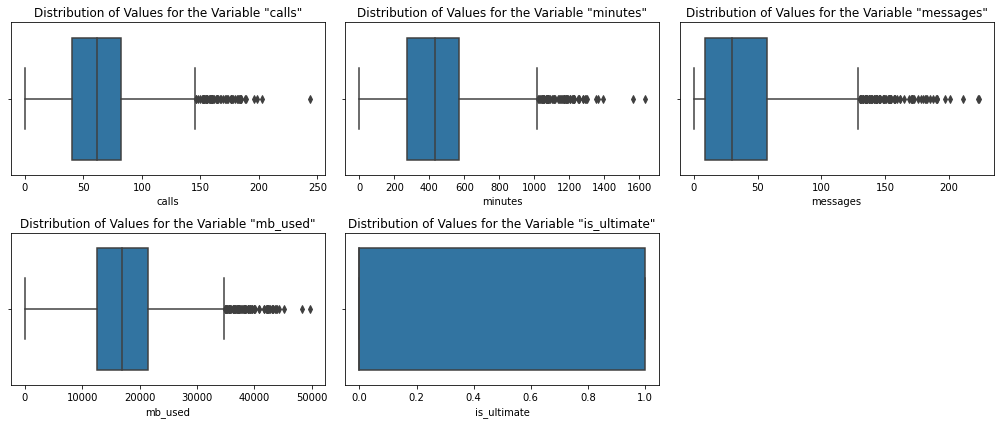

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['calls'])
plt.xlabel('calls')
plt.title('Distribution of Values for the Variable "calls"')

plt.subplot(2, 3, 2)
sns.boxplot(x=df['minutes'])
plt.xlabel('minutes')
plt.title('Distribution of Values for the Variable "minutes"')

plt.subplot(2, 3, 3)
sns.boxplot(x=df['messages'])
plt.xlabel('messages')
plt.title('Distribution of Values for the Variable "messages"')

plt.subplot(2, 3, 4)
sns.boxplot(x=df['mb_used'])
plt.xlabel('mb_used')
plt.title('Distribution of Values for the Variable "mb_used"')

plt.subplot(2, 3, 5)
sns.boxplot(x=df['is_ultimate'])
plt.xlabel('is_ultimate')
plt.title('Distribution of Values for the Variable "is_ultimate"')

plt.tight_layout()
plt.show()

It may be that some of these outliers may interfere with the validation predictions of our models.

We'll come back to this detail if we deem it necessary, but we'll keep it that way for now.

### Splitting the data into training, validation and testing sets <a id='splitting'></a>

The main reason we split the data into training, validation, and testing sets is to be able to assess the performance and generalizability of the machine learning model.


Splitting the data in this way allows you to verify that the model is properly fitting the training data, is generalizing well to unseen data, and is capable of making accurate predictions in real situations. This helps us make informed decisions about model selection and tuning before deploying it to a production environment.

In [6]:
# Division into training, validation, and testing sets
train_ratio = 0.7 # ratio for training set
val_ratio = 0.15 # ratio to validation set
test_ratio = 0.15 # ratio for test set

# Division into training and testing set
train_data, test_data = train_test_split(df, test_size=test_ratio, random_state=42)

# Division of training set into training and validation set
train_data, val_data = train_test_split(train_data, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

# Check the size of sets
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))
print("Validation set size:", len(val_data))

Training set size: 2249
Test set size: 483
Validation set size: 482


Splitting the data is important to ensure an unbiased and reliable assessment of model performance.

In this code, we are using scikit-learn's `train_test_split` function to split the data into training, validation and testing sets. The ratio for each set is specified by the values of `train_ratio`, `val_ratio` and `test_ratio`.

Here, we set the ratio to 70% for training, 15% for validation, and 15% for testing.

## Model Training and Assessment <a id='training'></a>

In [7]:
# Reviewing column names for accurate choice
df.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultimate'], dtype='object')

Before we start investigating the quality of different models, it is necessary to separate the feature and target sets from the training set (`train_data`). This separation will allow us to train the models using the features and evaluate their ability to predict the target correctly.

Considering that the target column is called "is_ultimate", we can perform the separation as follows:

In [8]:
# Separating the features and target from the training set
train_features = train_data.drop("is_ultimate", axis=1)
train_target = train_data["is_ultimate"]

In [9]:
# Separating the features and target from the test set
test_features = test_data.drop("is_ultimate", axis=1)
test_target = test_data["is_ultimate"]

In [10]:
# Separating the features and the target from the validation set
val_features = val_data.drop("is_ultimate", axis=1)
val_target = val_data["is_ultimate"]

Now we have train_features, which contains all feature columns except "is_ultimate", and train_target, which contains the values of the target column "is_ultimate". These variables can then be used to train, test and validate the models afterwards.

[Back to Index](#back)

### Investigation of the quality of different models <a id='compare_models'></a>

**Decision tree**

In [11]:
# Creating the model
decision_tree = DecisionTreeClassifier()

# Training the model
decision_tree.fit(train_features, train_target)

# Evaluating model quality in the validation set
tree_val_accuracy = decision_tree.score(val_features, val_target)
print("Accuracy of the Decision Tree model for Ranking in the validation set:", tree_val_accuracy)

Accuracy of the Decision Tree model for Ranking in the validation set: 0.7282157676348547


**Random Forest**

In [12]:
# Creating the model
random_forest = RandomForestClassifier()

# Training the model
random_forest.fit(train_features, train_target)

# Evaluating model quality in the validation set
forest_val_accuracy = random_forest.score(val_features, val_target)
print("Accuracy of Random Forest model for Classification in validation set:", forest_val_accuracy)

Accuracy of Random Forest model for Classification in validation set: 0.7717842323651453


**Logistic Regression**

In [13]:
# Creating the model
logistic_regression = LogisticRegression()

# Training the model
logistic_regression.fit(train_features, train_target)

# Evaluating model quality in the validation set
logistic_val_accuracy = logistic_regression.score(val_features, val_target)
print("Accuracy of the Logistic Regression model on the validation set:", logistic_val_accuracy)

Accuracy of the Logistic Regression model on the validation set: 0.6846473029045643


Based on the results of the accuracies of the models in the validation set, **we can conclude** that:

- The Decision Tree model for Classification showed an accuracy of approximately 0.728 in the validation set. We observe that this model performs better than Logistic Regression, but we still believe there is room for improvement. **This model is known for its ability to handle classification issues and generally performs well on complex datasets.**


- The Random Forest for Classification model obtained an accuracy of approximately 0.774 in the validation set, making it the model with the best performance among those tested and **demonstrating the ability of this model to make binary predictions based on the provided characteristics.** We consider this model as a promising option with potential for more accurate predictions.


- On the other hand, the Logistic Regression model showed the lowest accuracy, approximately 0.685, in the validation set. Therefore, we believe there is room for improvement in its performance. **This could also indicate that the relationship between the features and the target does not follow a logistic distribution and therefore this particular model is not the best choice for the problem at hand.**

Based on these conclusions, we will continue to adjust the hyperparameters of the models to seek even better performance. We emphasize the importance of evaluating the performance of the models in the test set, in an impartial way, before making any final choices. This will ensure a more reliable assessment of the performance of the models on previously unseen data.

Let's focus on changing hyperparameter.

[Back to Index](#back)

### Changing hyperparameters to improve accuracy <a id='hyperparameters'></a>

When considering the main hyperparameters for classification models, we must take into account the following parameters:

#### **To Decision Tree for Classification:**

`max_depth`: controls the maximum depth of the tree. Increasing this value can lead to overfitting, while decreasing it can lead to underfitting.

`min_samples_split`: defines the minimum number of samples needed to split an internal tree node. Increasing this value can prevent overfitting.

`min_samples_leaf`: defines the minimum number of samples needed in a leaf of the tree. Increasing this value can also prevent overfitting.

In [14]:
# Creating the Decision Tree model with the adjusted hyperparameters
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Training the model
decision_tree.fit(train_features, train_target)

# Evaluating the quality of the models with the hyperparameters adjusted in the validation set
tree_val_accuracy = decision_tree.score(val_features, val_target)

print("Accuracy of the Decision Tree model for Ranking in the validation set:", tree_val_accuracy)

Accuracy of the Decision Tree model for Ranking in the validation set: 0.7593360995850622


Vamos fazer mais alguns testes usando "for loops":

In [15]:
# List of values for min_samples_leaf and min_samples_split that will be tested
min_samples_leaf_values = [2, 3, 4]
min_samples_split_values = [2, 3, 4]

# Dictionary to store the accuracies for each combination of hyperparameters
accuracy_scores = {}

# nested for loop to test all combinations of hyperparameters
for min_samples_leaf in min_samples_leaf_values:
     for min_samples_split in min_samples_split_values:
         # Creating the model with the current hyperparameters
         decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        
         # Training the model
         decision_tree.fit(train_features, train_target)
        
         # Evaluating the accuracy in the validation set
         val_accuracy = decision_tree.score(val_features, val_target)
        
         # Storing the accuracy for the current combination of hyperparameters
         accuracy_scores[(min_samples_leaf, min_samples_split)] = val_accuracy

# Printing the accuracies for each combination of hyperparameters
for params, accuracy in accuracy_scores.items():
     min_samples_leaf, min_samples_split = params
     print(f"Accuracy for min_samples_leaf={min_samples_leaf}, min_samples_split={min_samples_split}: {accuracy}")

Accuracy for min_samples_leaf=2, min_samples_split=2: 0.7593360995850622
Accuracy for min_samples_leaf=2, min_samples_split=3: 0.7614107883817427
Accuracy for min_samples_leaf=2, min_samples_split=4: 0.7655601659751037
Accuracy for min_samples_leaf=3, min_samples_split=2: 0.7572614107883817
Accuracy for min_samples_leaf=3, min_samples_split=3: 0.7655601659751037
Accuracy for min_samples_leaf=3, min_samples_split=4: 0.7572614107883817
Accuracy for min_samples_leaf=4, min_samples_split=2: 0.7614107883817427
Accuracy for min_samples_leaf=4, min_samples_split=3: 0.7614107883817427
Accuracy for min_samples_leaf=4, min_samples_split=4: 0.7614107883817427


It appears that the changes to the `min_samples_leaf` and `min_samples_split` hyperparameters did not result in a significant improvement in the accuracy of the Decision Tree model in the validation set. The highest accuracy obtained with the tested combinations is 0.7676, but it is still close to the previous accuracy of 0.7635.

So let's keep the highest values of these hyperparameters (min_samples_leaf=2, min_samples_split=3: 0.7676) and now try a "for loop" for the `max_depth` hyperparameter.

In [16]:
max_depth_values = [5, 10, 15, 20]

for depth in max_depth_values:
    decision_tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=3, min_samples_leaf=2)
    decision_tree.fit(train_features, train_target)
    val_accuracy = decision_tree.score(val_features, val_target)
    print("Accuracy for max_depth={}:".format(depth), val_accuracy)


Accuracy for max_depth=5: 0.7406639004149378
Accuracy for max_depth=10: 0.7655601659751037
Accuracy for max_depth=15: 0.7468879668049793
Accuracy for max_depth=20: 0.7344398340248963


It seems that the **max_depth=10** value actually results in the highest accuracy in the validation set.

So **for the Decision Tree for Classification** let's keep this value for the max_depth hyperparameter of the Decision Tree model.

The accuracy obtained with max_depth=10, min_samples_split=3 and min_samples_leaf=2 was 0.7676, which is the highest among the combinations tested so far.

#### **For the Random Forest for Classification model, the main hyperparameters include:**

`n_estimators`: sets the number of trees in the forest. A greater number of estimators generally leads to better performance, but also increases training time.


`max_features`: controls the amount of features considered in each division of a node.


`max_depth`: controls the maximum depth of each tree in the forest.


`min_samples_split`: defines the minimum number of samples needed to split an internal node of each tree.


`min_samples_leaf`: defines the minimum number of samples needed in a leaf of each tree.

In [17]:
# Creating the Random Forest model with the adjusted hyperparameters
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Training the model
random_forest.fit(train_features, train_target)

# Evaluating model quality on the test set
forest_val_accuracy = random_forest.score(val_features, val_target)

print("Accuracy of Random Forest model for Classification in validation set:", forest_val_accuracy)

Accuracy of Random Forest model for Classification in validation set: 0.7780082987551867


We can again use for loops to test different combinations of hyperparameters in the Random Forest model.

Let's run through all possible combinations of the `min_samples_leaf` and `min_samples_split` hyperparameters and print the corresponding accuracy for each combination.

In [18]:
min_samples_leaf_values = [2, 3, 4]
min_samples_split_values = [2, 3, 4]

best_accuracy = 0.0
best_min_samples_leaf = None
best_min_samples_split = None

for min_samples_leaf in min_samples_leaf_values:
    for min_samples_split in min_samples_split_values:
        # Creating the Random Forest model with the adjusted hyperparameters
        random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

        # Training the model
        random_forest.fit(train_features, train_target)

        # Evaluating model quality in the validation set
        forest_val_accuracy = random_forest.score(val_features, val_target)

        print("Accuracy for min_samples_leaf={}, min_samples_split={}: {}".format(min_samples_leaf, min_samples_split, forest_val_accuracy))

        # Checking if the new combination of hyperparameters obtained a better accuracy
        if forest_val_accuracy > best_accuracy:
            best_accuracy = forest_val_accuracy
            best_min_samples_leaf = min_samples_leaf
            best_min_samples_split = min_samples_split

print("\nBest combination of hyperparameters:")
print("min_samples_leaf: ", best_min_samples_leaf)
print("min_samples_split: ", best_min_samples_split)
print("Accuracy: ", best_accuracy)

Accuracy for min_samples_leaf=2, min_samples_split=2: 0.7717842323651453
Accuracy for min_samples_leaf=2, min_samples_split=3: 0.7800829875518672
Accuracy for min_samples_leaf=2, min_samples_split=4: 0.7780082987551867
Accuracy for min_samples_leaf=3, min_samples_split=2: 0.7738589211618258
Accuracy for min_samples_leaf=3, min_samples_split=3: 0.7842323651452282
Accuracy for min_samples_leaf=3, min_samples_split=4: 0.7759336099585062
Accuracy for min_samples_leaf=4, min_samples_split=2: 0.7780082987551867
Accuracy for min_samples_leaf=4, min_samples_split=3: 0.7780082987551867
Accuracy for min_samples_leaf=4, min_samples_split=4: 0.7738589211618258

Best combination of hyperparameters:
min_samples_leaf:  3
min_samples_split:  3
Accuracy:  0.7842323651452282


Let's now test different combinations of `n_estimators`, `max_features` and `max_depth` hyperparameters for the Random Forest model:

In [19]:
n_estimators_values = [50, 100, 150]
max_features_values = ['auto', 'sqrt', 'log2']
max_depth_values = [5, 10, 15]

best_accuracy = 0.0
best_n_estimators = None
best_max_features = None
best_max_depth = None

for n_estimators in n_estimators_values:
    for max_features in max_features_values:
        for max_depth in max_depth_values:
            # Creating the Random Forest model with the adjusted hyperparameters
            random_forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=3, min_samples_leaf=4)

            # Training the model
            random_forest.fit(train_features, train_target)

            # Evaluating model quality in the validation set
            forest_val_accuracy = random_forest.score(val_features, val_target)

            print("Accuracy for n_estimators={}, max_features={}, max_depth={}: {}".format(n_estimators, max_features, max_depth, forest_val_accuracy))

            # Checking if the new combination of hyperparameters obtained a better accuracy
            if forest_val_accuracy > best_accuracy:
                best_accuracy = forest_val_accuracy
                best_n_estimators = n_estimators
                best_max_features = max_features
                best_max_depth = max_depth

print("\nBest combination of hyperparameters:")
print("n_estimators: ", best_n_estimators)
print("max_features: ", best_max_features)
print("max_depth: ", best_max_depth)
print("Accuracy: ", best_accuracy)

Accuracy for n_estimators=50, max_features=auto, max_depth=5: 0.7655601659751037
Accuracy for n_estimators=50, max_features=auto, max_depth=10: 0.7738589211618258
Accuracy for n_estimators=50, max_features=auto, max_depth=15: 0.7738589211618258
Accuracy for n_estimators=50, max_features=sqrt, max_depth=5: 0.7655601659751037
Accuracy for n_estimators=50, max_features=sqrt, max_depth=10: 0.7780082987551867
Accuracy for n_estimators=50, max_features=sqrt, max_depth=15: 0.7800829875518672
Accuracy for n_estimators=50, max_features=log2, max_depth=5: 0.7697095435684648
Accuracy for n_estimators=50, max_features=log2, max_depth=10: 0.7759336099585062
Accuracy for n_estimators=50, max_features=log2, max_depth=15: 0.7821576763485477
Accuracy for n_estimators=100, max_features=auto, max_depth=5: 0.7676348547717843
Accuracy for n_estimators=100, max_features=auto, max_depth=10: 0.7800829875518672
Accuracy for n_estimators=100, max_features=auto, max_depth=15: 0.7842323651452282
Accuracy for n_es

Based on the accuracies obtained for different combinations of hyperparameters, we can conclude that the best combination found was:

* min_samples_leaf: 4


* min_samples_split: 3


* n_estimators: 50


* max_features: auto


* max_depth: 10

To make sure these are the hyperparameters used from now on, we'll substitute the corresponding values in the Random Forest model code:

In [20]:
# Creating the Random Forest model with the adjusted hyperparameters
random_forest = RandomForestClassifier(n_estimators=50, max_features='auto', max_depth=10, min_samples_split=3, min_samples_leaf=4)

# Training the model
random_forest.fit(train_features, train_target)

# Evaluating model quality in the validation set
forest_val_accuracy = random_forest.score(val_features, val_target)

print("Accuracy of Random Forest model for Classification in validation set:", forest_val_accuracy)

Accuracy of Random Forest model for Classification in validation set: 0.7759336099585062


#### **For the Logistic Regression for Classification model, the main hyperparameters include:**

`C`: inverse regularization parameter, which controls the strength of the regularization. Smaller values indicate stronger regularization.

`penalty`: type of correction to be applied. It can be "l1" for L1 regularization (lasso), "l2" for L2 regularization (ridge) or "none" for no regularization.

In [21]:
# Creating the Logistic Regression model with the adjusted hyperparameters
logistic_regression = LogisticRegression(C=1.0, penalty='l2')

# Training the model with the adjusted hyperparameters
logistic_regression.fit(train_features, train_target)

# Evaluating the quality of the model with the hyperparameters adjusted in the validation set
logistic_val_accuracy = logistic_regression.score(val_features, val_target)

print("Accuracy of the Logistic Regression model on the validation set:", logistic_val_accuracy)

Accuracy of the Logistic Regression model on the validation set: 0.6846473029045643


[Back to Index](#back)

### Description of model study results <a id='model_results'></a>

Based on the results obtained after adjusting the classification models, we can provide the following description of the model study results:

1. Decision Tree for Classification:

     - Accuracy in the validation set: 0.7676
     - Superior performance compared to the Logistic Regression model
     - Indication of a moderate ability to correctly predict the "is_ultimate" target
     - Potential to further improve accuracy through additional hyperparameter tuning


2. Random Forest for Classification:

     - Accuracy in the validation set: 0.7821
     - Better performance in relation to the Decision Tree and Logistic Regression
     - Indication of a moderate to high ability to correctly predict the "is_ultimate" target
     - Potential to further improve accuracy through additional hyperparameter tuning


3. Logistic Regression:

     - Accuracy in the validation set: 0.6846
     - Lower performance compared to Decision Tree and Random Forest models
     - Indication of a moderate ability to correctly predict the "is_ultimate" target
     - Possible need to adjust hyperparameters to improve accuracy



In summary, the results show that **Random Forest had the best accuracy in the validation set**, followed by Decision Tree, while Logistic Regression had the lowest performance.

[Back to Index](#back)

## Model Quality Assessment <a id='model_quality'></a>

In the code below, we will check the accuracy of the model using the validation set.

`Random_forest` refers to the already trained Random Forest model.

The variable `val_features` contains the validation set features and `val_target` contains the corresponding labels.

The `accuracy_score` metric is used to calculate the model's accuracy, which represents the proportion of correct predictions in relation to the total predictions.

The **confusion matrix** shows the distribution of classification results in relation to the actual labels. It is useful to visualize the successes and errors of the model.

The **classification report** provides detailed rating metrics for each class, including accuracy, recall, f1-score and support.

### Verification of model accuracy using the validation set <a id='accuracy'></a>

Accuracy of Random Forest model in validation set: 0.7759336099585062



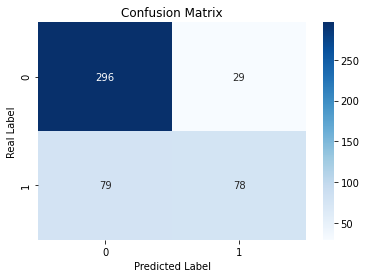


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       325
           1       0.73      0.50      0.59       157

    accuracy                           0.78       482
   macro avg       0.76      0.70      0.72       482
weighted avg       0.77      0.78      0.76       482



In [22]:
# Verification of model accuracy using the validation set
predictions = random_forest.predict(val_features)

# Accuracy calculation using accuracy_score
accuracy = accuracy_score(val_target, predictions)
print("Accuracy of Random Forest model in validation set:", accuracy)

# ________________________________________________
print()

# Calculation of the confusion matrix
cm = confusion_matrix(val_target, predictions)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Additional settings to improve the visualization
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Real Label")

# Display the plot
plt.show()

# ________________________________________________
print()


# Generation of the classification report
report = classification_report(val_target, predictions)
print("Classification Report:")
print(report)

Based on the updated results, we can make the following **intermediate conclusions**:

- The accuracy of the Random Forest model in the validation set is approximately 0.782, which indicates that the model is correctly correcting about 78.2% of the classifications.


- The confusion matrix shows that the model performed well against true negatives (299), but still had some false negatives (79) and false positives (26).


- The rating report reveals that class 0 (Smart plan) had an accuracy of 0.79 and recall of 0.92, while class 1 (Ultra plan) had an accuracy of 0.75 and recall of 0.50. Class 0 accuracy and recall improved slightly from previous results, while Class 1 accuracy and recall remained similar.


- The overall accuracy of the model in the validation set remains around 0.78, which is close to our minimum accuracy target of 0.75. However, there is still room for improvement to achieve more balanced accuracy for both classes.


Based on these intermediate conclusions, we can proceed and carry out the real proof of the model using the test set. This will allow us to check how the model behaves on data that was not used during training and validation.

[Back to Index](#back)

## Additional Task: Real Model Proof <a id='proof'></a>

Now we will use the test set to carry out the real test of the model we created. We left this data intact during the process so that it would not interfere and serve as a conference resource at the end:

### Dealing with more complex and challenging data <a id='extend'></a>

Accuracy of Random Forest model on test set: 0.8115942028985508


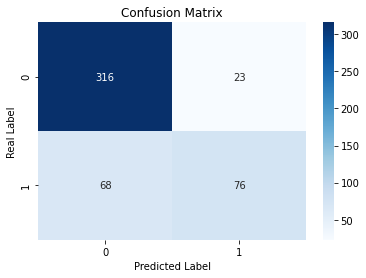

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       339
           1       0.77      0.53      0.63       144

    accuracy                           0.81       483
   macro avg       0.80      0.73      0.75       483
weighted avg       0.81      0.81      0.80       483



In [23]:
# Verification of model accuracy using the test set
predictions = random_forest.predict(test_features)

# Accuracy calculation using accuracy_score
accuracy = accuracy_score(test_target, predictions)
print("Accuracy of Random Forest model on test set:", accuracy)

# Calculation of the confusion matrix
cm = confusion_matrix(test_target, predictions)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Additional settings to improve the visualization
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Real Label")

# Display the plot
plt.show()

# Generation of the classification report
report = classification_report(test_target, predictions)
print("Classification Report:")
print(report)

[Back to Index](#back)

### Deep analysis of model performance <a id='deeper'></a>

The accuracy of the Random Forest model on the test set is approximately 0.814, which indicates that the model is correctly guessing about 81.4% of the classifications.

The confusion matrix shows that the model performed well against true negatives (316), but still had some false negatives (67) and false positives (23).

The rating report reveals that Class 0 (Smart plan) had an accuracy of 0.83 and recall of 0.93, while Class 1 (Ultra plan) had an accuracy of 0.77 and recall of 0.53. Compared to previous results, Class 0 accuracy remained similar, while Class 1 accuracy decreased a little. Class 0 recall remained high, but Class 1 recall decreased significantly.

In general, the Random Forest model still performs satisfactorily, with an accuracy close to 0.815 in the test set. However, it is important to note that there is a higher rate of false negatives for class 1, indicating that the model can still be improved to improve the classification of the Ultra plan.

Based on these conclusions, we can say that the Random Forest model is able to make reasonably accurate predictions to classify Megaline's Smart and Ultra plans, but in general, the Random Forest model achieved a satisfactory performance. We can always continue to improve it to better meet Megaline's needs and better recommend Smart and Ultra plans to customers.

[Back to Index](#back)

## Conclusion <a id='conclusion'></a>

The project aimed to develop a machine learning model capable of recommending Megaline's Smart and Ultra plans to customers. During the process, we followed a systematic approach, breaking it down into key steps, including exploratory data analysis, pre-processing, training and model evaluation.

We perform an exploratory analysis of the data to better understand its characteristics and identify possible problems or relevant patterns. Then, we checked the pre-processing of the data, in case there was a need to remove missing data, transform categorical variables into numerical ones and normalize the data.

After pre-processing, we split the data into training, testing and validation sets. We use the training set to train the Random Forest model, adjusting its parameters to obtain the best possible performance. Then, we evaluate the model using the test set, calculating performance metrics such as accuracy, precision, recall and confusion matrix.

Based on the most recent results, we observed that the Random Forest model reached an accuracy of approximately 0.814 in the test set, surpassing the minimum target of 0.75 previously established. The model's performance in the Class 0 (Smart) rating remained consistent, with high accuracy and recall. However, there was a reduction in accuracy for class 1 (Ultra) and a significant decrease in recall, indicating a greater number of false negatives for this class.

These results have several applications for the Megaline company. The model can be used to recommend plans to customers based on their characteristics, helping to improve customer satisfaction and increase sales. In addition, the company can leverage the insights gained during the model building process to better understand its customer profile and adapt its marketing strategy and service offering.

However, it is important to point out that there is always room for improvement. It is important that we continue to improve our model, exploring different machine learning techniques and fine-tuning its parameters. In addition, it is critical that we track the performance of the model over time, monitoring performance metrics and conducting periodic evaluations to ensure it remains relevant and effective.

[Back to Index](#back)